In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import StratifiedKFold
from matplotlib import pyplot
from collections import Counter

In [2]:
import os
print(os.listdir('c:/Users/palas/Downloads/archive/'))

['haberman.csv']


In [3]:
df = pd.read_csv('c:/Users/palas/Downloads/archive//haberman.csv', header=None, names=['age', 'treatment_year', '+ve_lymph_nodes', 'survival_status'])
df.head()

,age,treatment_year,+ve_lymph_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              306 non-null    int64
 1   treatment_year   306 non-null    int64
 2   +ve_lymph_nodes  306 non-null    int64
 3   survival_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [5]:
print(df.shape)

(306, 4)


C:\Users\palas\anaconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


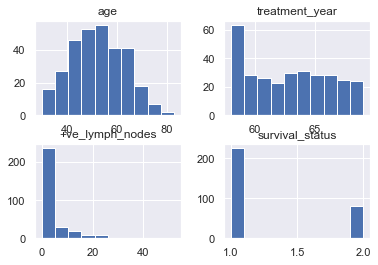

C:\Users\palas\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\palas\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


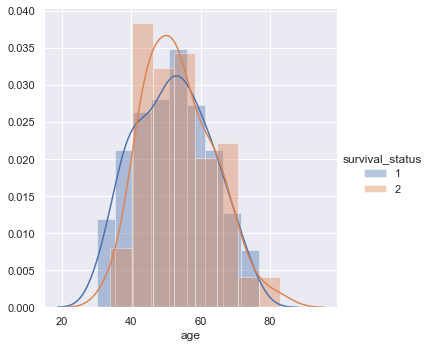

C:\Users\palas\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\palas\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


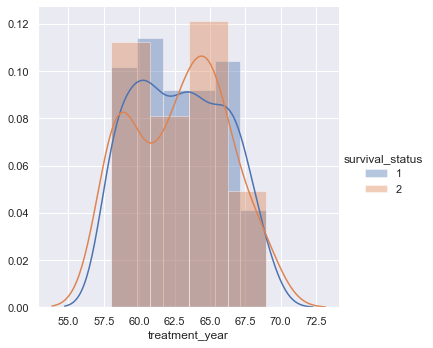

C:\Users\palas\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\palas\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


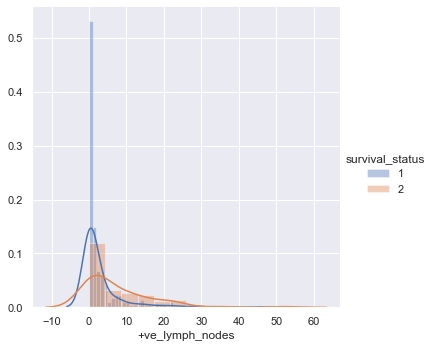

In [6]:
df.describe()
df.hist()
pyplot.show()

for idx, feature in enumerate(list(df.columns)[:-1]):
    fg = sns.FacetGrid(df, hue='survival_status', height=5)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()



it seems the age variable has a Gaussian-like distribution and the year of treatment and positive lymmph notdes variables may have an exponential distribution.

we can try a power transform on each variable in order to make the probability distribution less skewed which will likely improve model performance.

Here the height of the bar denotes the percentage of data points under the corresponding group.

The number of positive lymph nodes of the survivors is highly densed from 0 to 5.

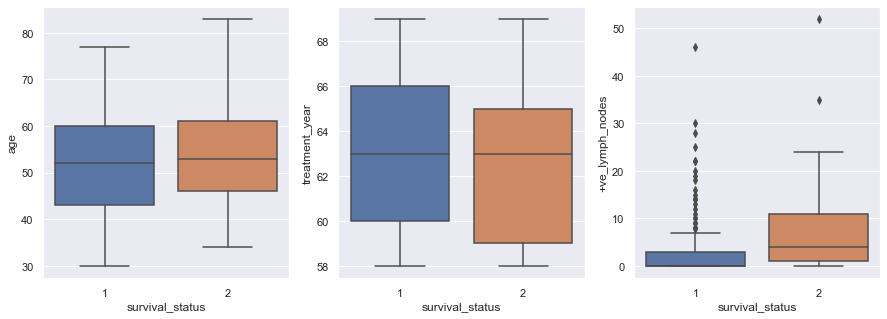

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(df.columns)[:-1]):
    sns.boxplot( x='survival_status', y=feature, data=df, ax=axes[idx])
plt.show()

The outliers are displayed as points outside the box.
1. Q1 - 1.5*IQR
2. Q1 (25th percentile)
3. Q2 (50th percentile or median)
4. Q3 (75th percentile)
5. Q3 + 1.5*IQR
Inter Quartile Range = Q3 -Q1

The patients treated after 1966 have the slighlty higher chance to surive that the rest. The patients treated before 1959 have the slighlty lower chance to surive that the rest.

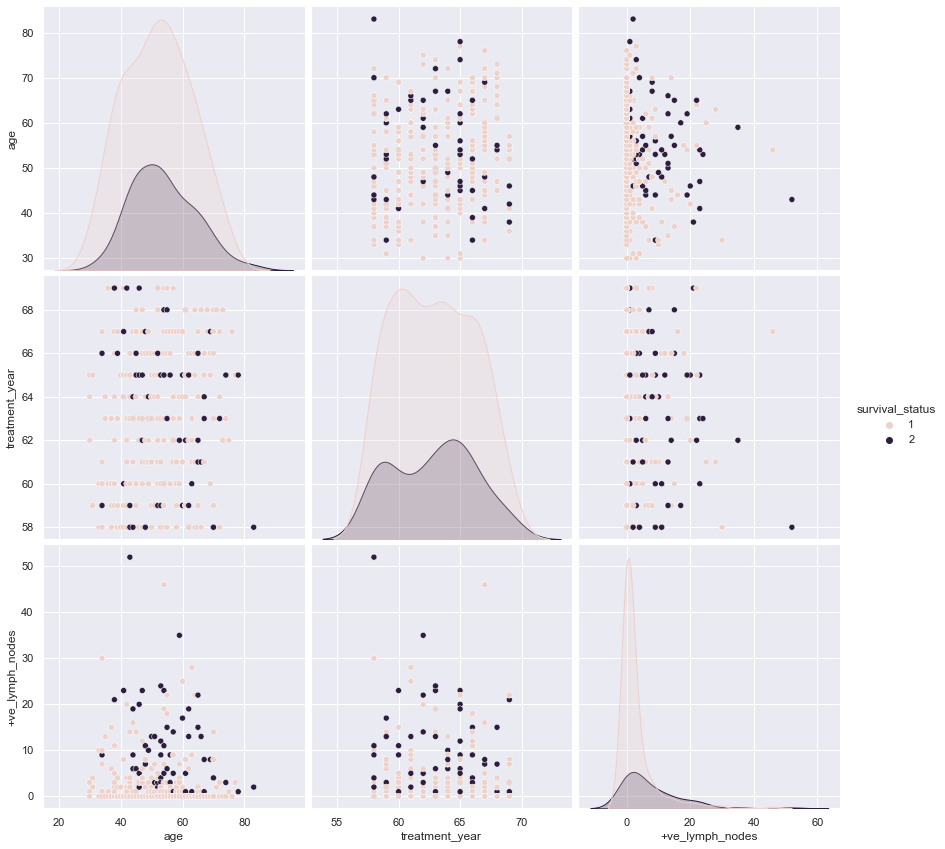

In [8]:
sns.pairplot(df, hue='survival_status', height=4)
plt.show()

There is a better seperation between treatment year and positive lymp nodes features.

In [9]:
#use counter object to count the number of exampels in survival status.
#distribution based on survival status
target = df['survival_status'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Survival status=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Survival status=1, Count=225, Percentage=73.529%
Survival status=2, Count=81, Percentage=26.471%


status 1 represents survived count and has the higher count of 225 , or about 74 percent of the dataset. staus 2 is non-survival status which has fewer count of 81, or about 26 percent of the dataset.


--------------------------------------------------------------------------------------------------------------------------------------------------------------

# Multilayer Perceptron model

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM

import logging
logging.getLogger('tensorflow').disabled = True

X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
labelEncode = LabelEncoder()
y = labelEncode.fit_transform(y)


In [ ]:
kfold = StratifiedKFold(10, random_state=1, shuffle = True)
# enumerate splits
scores = list()
for train_ix, test_ix in kfold.split(X, y):
    # split data
    X_train, X_test, y_train, y_test = X[train_ix], X[test_ix], y[train_ix], y[test_ix]
    # determine the number of input features
    n_features = X.shape[1]
    # define model
    model = Sequential()
    model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
    model.add(Dense(1, activation='sigmoid'))
    # compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy')
    # fit the model
    model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=0)
    # predict test set
    yhat = model.predict_classes(X_test)
    # evaluate predictions
    score = accuracy_score(y_test, yhat)
    print('>%.3f' % score)
    scores.append(score)

C:\Users\palas\anaconda3\envs\tensorflow-2.0\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


>0.710


C:\Users\palas\anaconda3\envs\tensorflow-2.0\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


>0.710


C:\Users\palas\anaconda3\envs\tensorflow-2.0\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


>0.742


C:\Users\palas\anaconda3\envs\tensorflow-2.0\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


>0.742


C:\Users\palas\anaconda3\envs\tensorflow-2.0\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


>0.742


C:\Users\palas\anaconda3\envs\tensorflow-2.0\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


>0.710


C:\Users\palas\anaconda3\envs\tensorflow-2.0\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


>0.767


C:\Users\palas\anaconda3\envs\tensorflow-2.0\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


>0.767


In [35]:
from numpy import mean, std
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.759 (0.039)


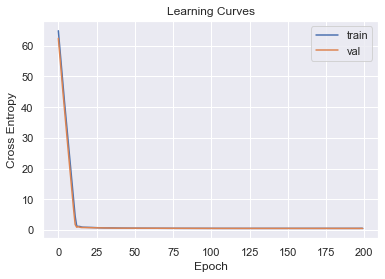

In [36]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [11]:
def run_model(train, test):
    n_features = train.shape[1]
    # define model
    model = Sequential()
    model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
    model.add(Dense(1, activation='sigmoid'))
    # compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy')
    # fit the model
    model.fit(train, test, epochs=200, batch_size=16, verbose=0)
    # define a row of new data
    row = [30,64,1]
    # make prediction
    yhat = model.predict_classes([row])
    # invert transform to get label for class
    yhat = labelEncode.inverse_transform(yhat)
    # report prediction
    print('Predicted: %s' % (yhat[0]))


In [12]:
run_model(X,y)

C:\Users\palas\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Predicted: 1


C:\Users\palas\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
